# Estrategia para la localización Óptima de Sensores de Contaminación Lumínica

In [520]:
from PIL import Image
import numpy as np
from noisyopt import minimizeCompass
from sortedcontainers import SortedList
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.pylab import rcParams
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
import matplotlib.patches as mpatches
from skimage.feature import peak_local_max


Carga de imágenes

In [522]:
#Original nocturnal image without values <21
im1 = np.array(Image.open('inputs/qro_light_th'))
im1 = np.where(im1==255, 0, im1) 

#Region priorities of Jorge and Lamphar
P = np.array(Image.open('inputs/prioridades'))

#calcular este valor automaticamente
nc = 5

# 0 máxima prioridad
# 4 mínima prioridad (antes espacio nan)
P = np.where(np.isnan(P),nc, P)-1 
P = P.max()-P


im1_gr = filtro_fuerza_puntual(im1,h=3,e=4)

W1 = f5(im1,P)
W2 = f5(im1_gr,P)


In [523]:
np.max(im1.flatten())


63

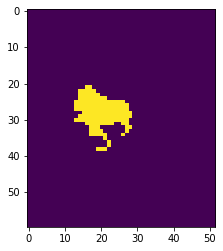

In [524]:
plt.imshow((im1>=63) )


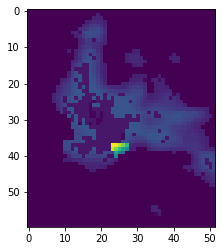

In [525]:
plt.imshow(W1)

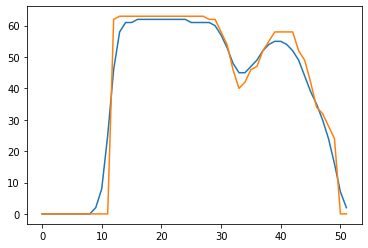

In [526]:
from scipy import misc
from scipy import ndimage
#plt.imshow(im1)

im1_blurred = ndimage.gaussian_filter(im1, sigma=1)


#plt.imshow(im1_blurred)

i = 30
plt.plot(im1_blurred[i,:])
plt.plot(im1[i,:])

In [527]:
i

30

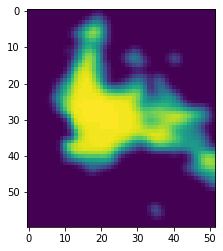

In [528]:
#im1[30,:]=0

plt.imshow(im1_blurred)

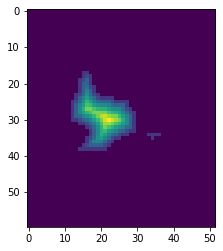

In [529]:
from scipy import ndimage as ndi

th = 62
image = im1>=th

distance = ndi.distance_transform_edt(image)

plt.imshow(distance)

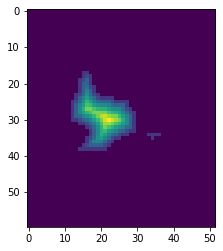

In [530]:
plt.imshow(distance*th)

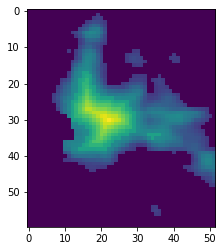

In [531]:

nons = (im1>=th)*im1

nonsat = im1+(distance*10)
plt.imshow(nonsat)



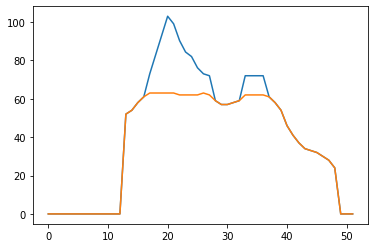

In [532]:
plt.plot(nonsat[34,:])
plt.plot(im1[34,:])

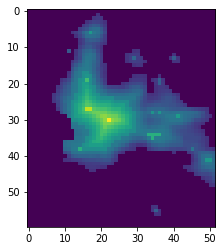

In [617]:

    

seeds = getMax(nonsat)
plt.imshow(seeds*20+nonsat)


In [615]:
from skimage.segmentation import watershed

def get_coords(seeds):
    coords = np.array([[0,0]])
    for i in range(0,seeds.shape[0]):
        for j in range(0,seeds.shape[1]):
            if seeds[i,j]!=0:
                coords = np.append(coords,[[i,j]],axis=0)
    return coords
            

In [619]:
coords = get_coords(seeds) 

In [620]:
mask = np.zeros(im1.shape, dtype=bool)
mask[tuple(coords.T)] = True

markers, _ = ndi.label(mask)
labels = watershed(-nonsat, markers, mask=im1)



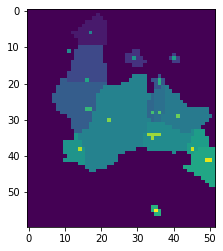

In [621]:
plt.imshow(labels+seeds*10)


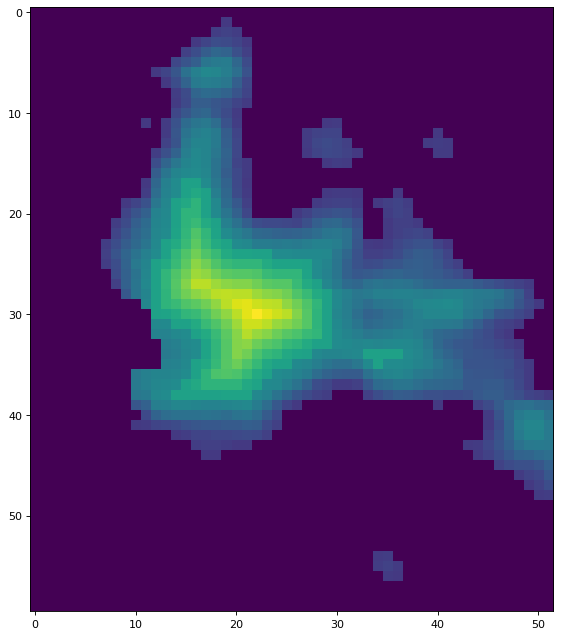

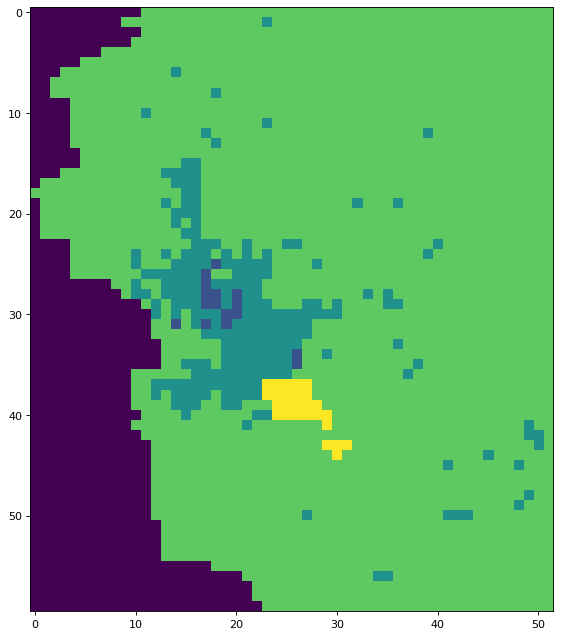

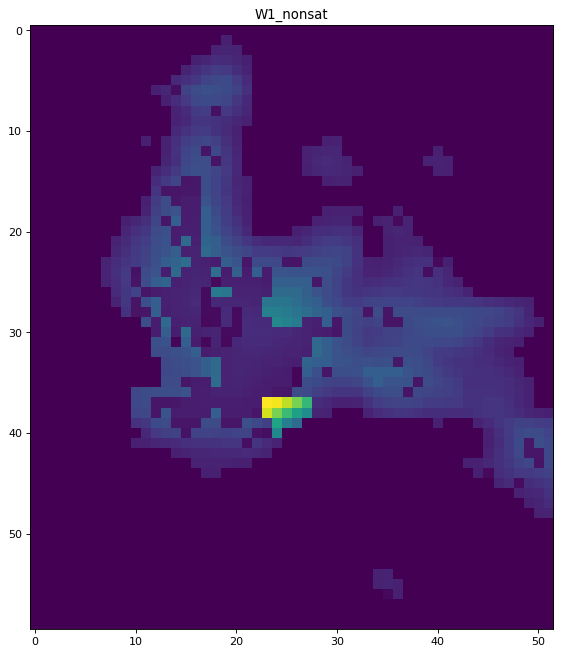

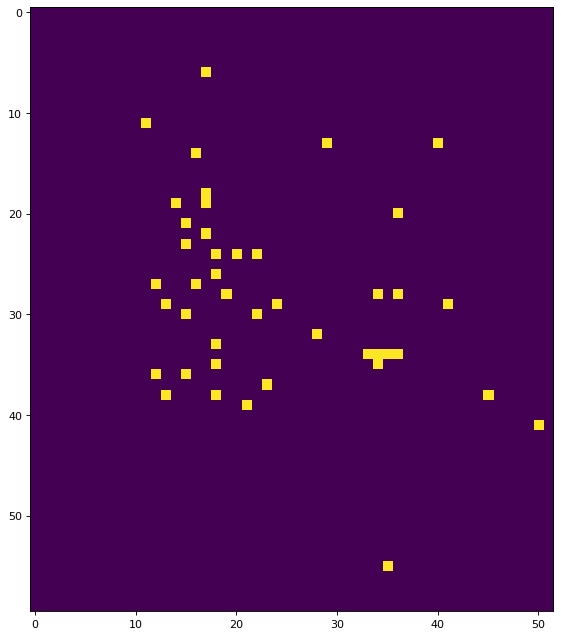

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

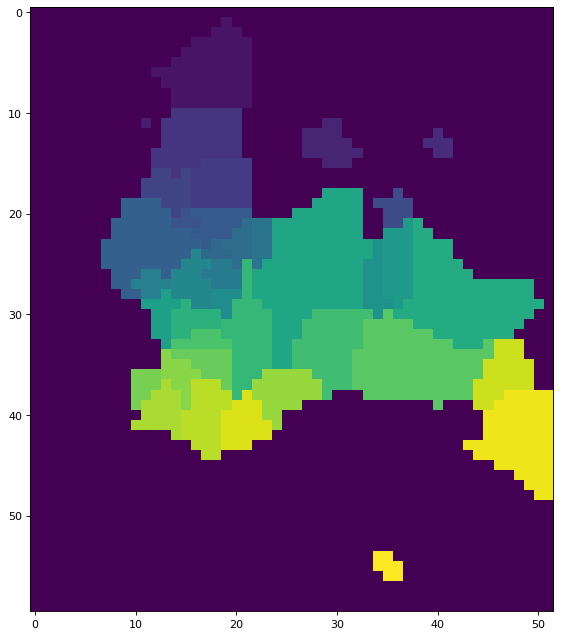

In [614]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(nonsat)
plt.show()

figure(figsize=(10, 10), dpi=80)
plt.imshow(P)
plt.show()

figure(figsize=(10, 10), dpi=80)
W1_nonsat = f5(nonsat,P)
plt.title("W1_nonsat")
plt.imshow(W1_nonsat)
plt.show()

figure(figsize=(10, 10), dpi=80)
seeds = getMax(W1_nonsat)
plt.imshow(seeds)
plt.show()

figure(figsize=(10, 10), dpi=80)
coords = get_coords(seeds)

figure(figsize=(10, 10), dpi=80)
mask = np.zeros(W1_nonsat.shape, dtype=bool)
mask[tuple(coords.T)] = True

figure(figsize=(10, 10), dpi=80)
markers, _ = ndi.label(mask)
labels = watershed(-W1_nonsat, markers, mask=W1_nonsat)
plt.imshow(labels)
plt.show()




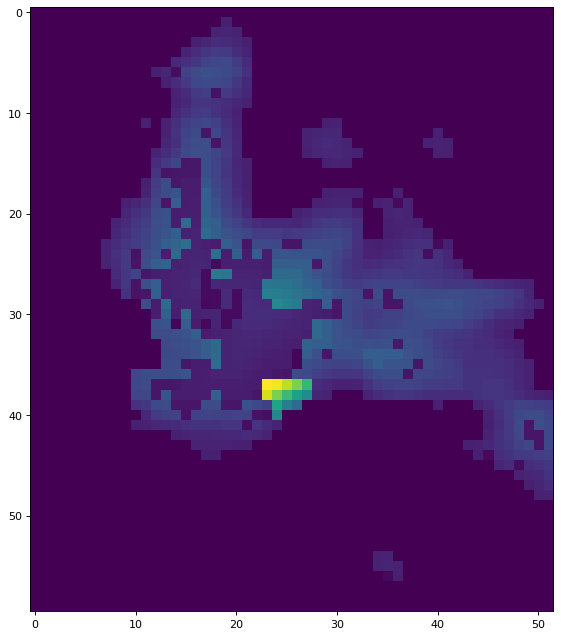

In [574]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(W1_nonsat)
plt.show()

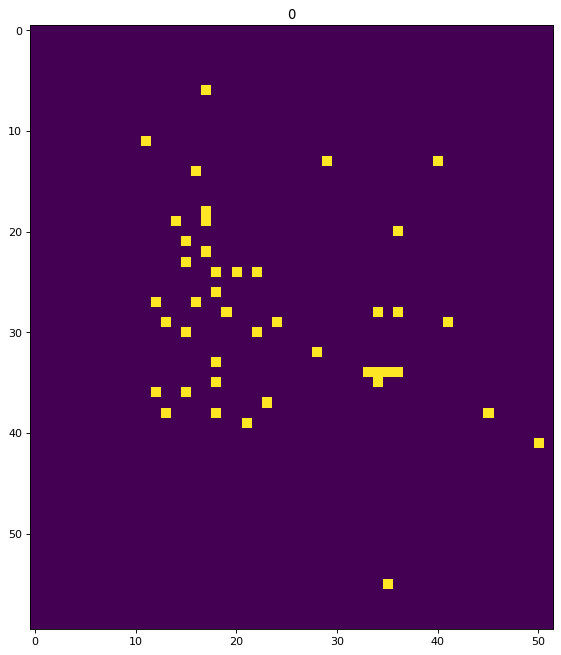

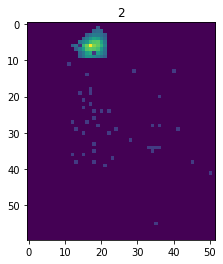

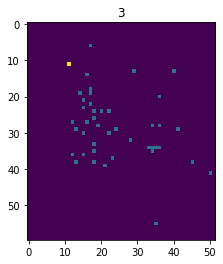

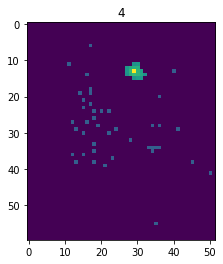

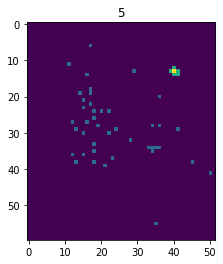

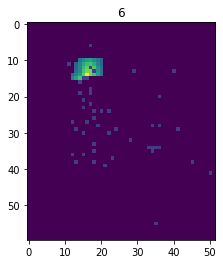

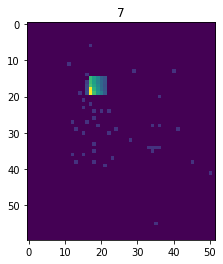

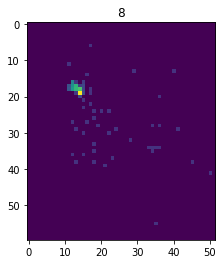

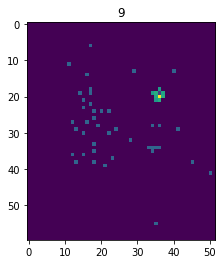

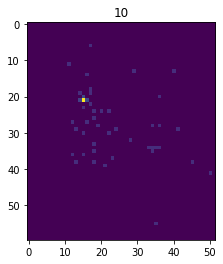

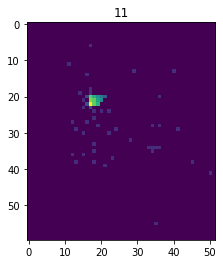

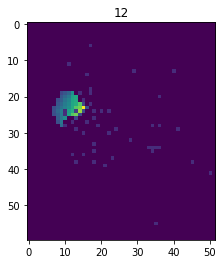

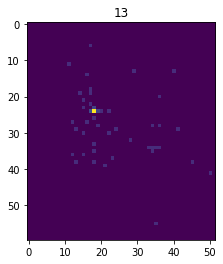

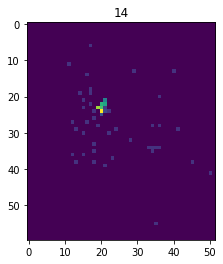

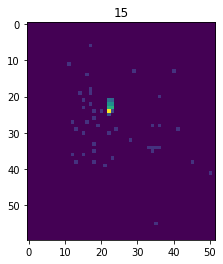

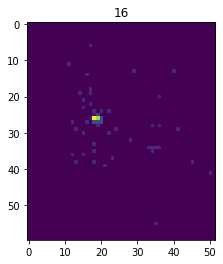

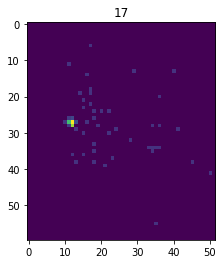

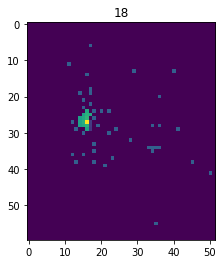

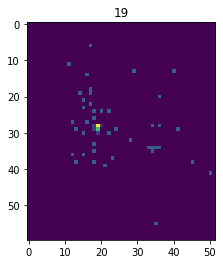

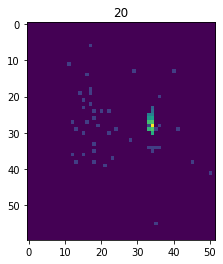

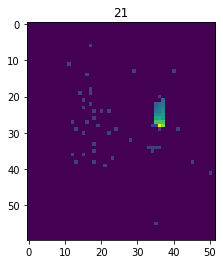

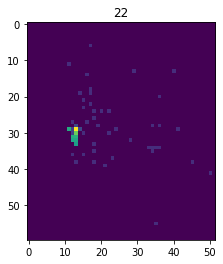

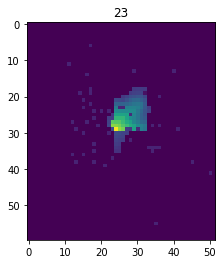

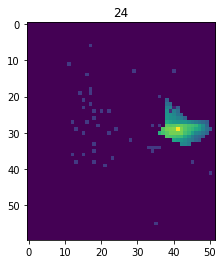

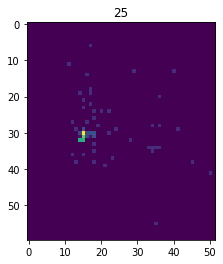

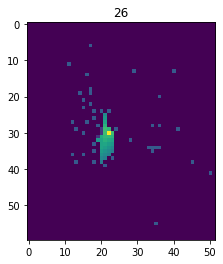

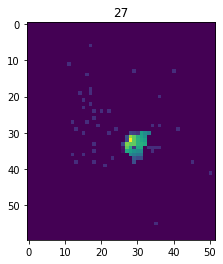

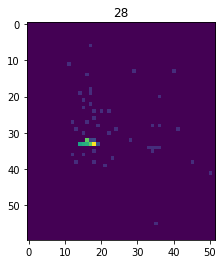

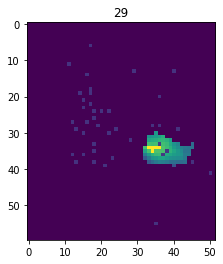

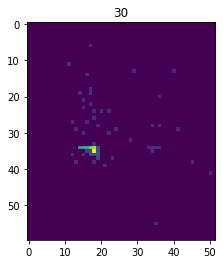

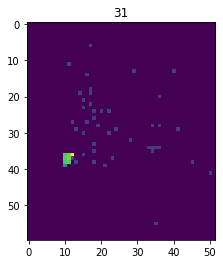

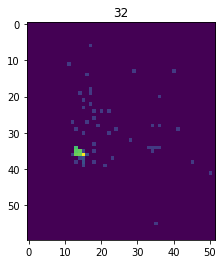

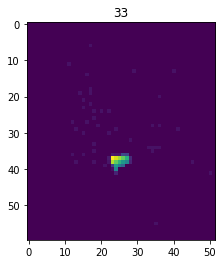

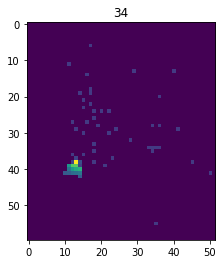

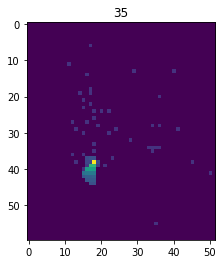

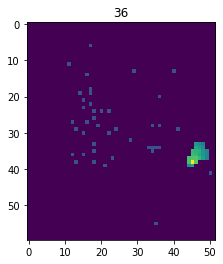

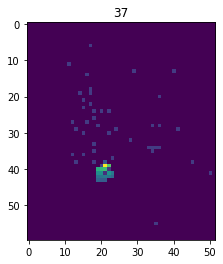

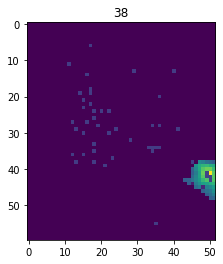

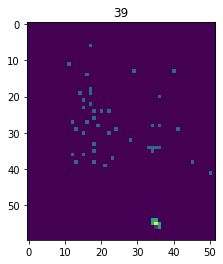

In [609]:
figure(figsize=(10, 10), dpi=80)
for i in list(set(labels.flatten())):
    plt.title(str(i))
    plt.imshow(1*(labels==i)*W1_nonsat+seeds*800)
    plt.show()


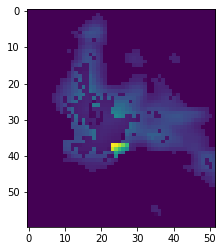

In [572]:
plt.imshow(W1_nonsat)

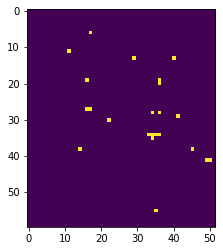

In [518]:
P = getMax(nonsat)
plt.imshow(P)


In [223]:
B = np.zeros(nonsat.shape)
for i in range(1,B.shape[0]-1):
    for j in range(1,B.shape[1]-1):

        B[i][j] = getN(distance,i,j)
        
positionsB = B*(distance>0)

locationsP = np.zeros(nonsat.shape)
for i in range(0,nonsat.shape[0]):
    for j in range(0,nonsat.shape[1]):
        locationsP[i][j] = 8 if positionsB[i][j]==1 else P[i,j]

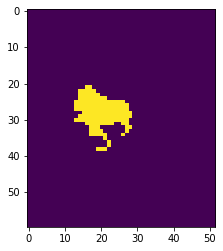

In [239]:
plt.imshow((distance>0)*1)

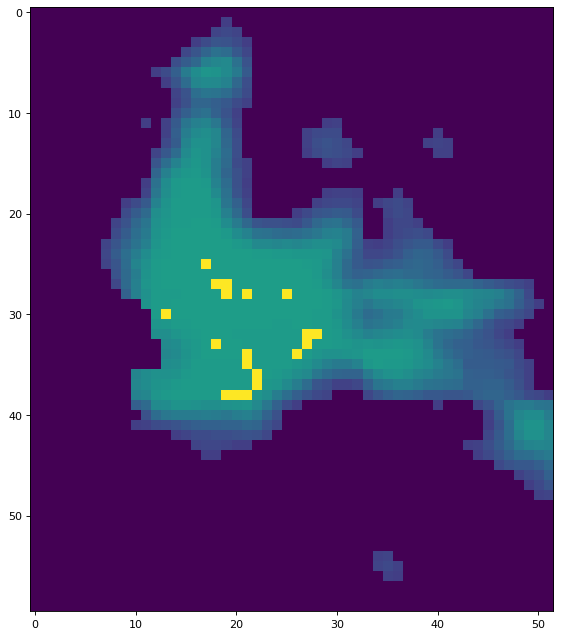

In [245]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
plt.imshow((B*((distance>0)*1))*50+im1)

In [238]:
set(B.flatten())

{0.0, 1.0}

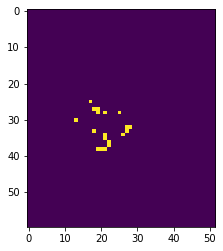

In [206]:
plt.imshow(distance*0+positionsB)

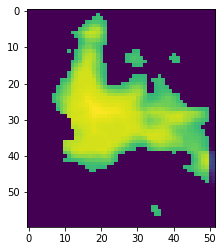

In [151]:
coords = peak_local_max(nonsat, footprint=np.ones((3, 3)), labels=nonsat)

zeros = np.zeros(np.shape(nonsat) )

for c in coords:
    zeros[c[0],c[1]]=1
    
plt.imshow(zeros*100+nonsat)

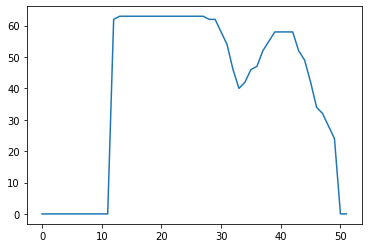

In [157]:
#plt.plot(nonsat[30,:])
plt.plot(im1[30,:])

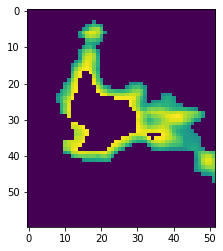

In [55]:
plt.imshow(((im1<=61) & (im1>=30) )*im1)

In [6]:
from skimage.segmentation import watershed
image = im1>=1
coords = peak_local_max(W2, footprint=np.ones((2, 2)), labels=image)


mask = np.zeros(im1_gr.shape, dtype=bool)
mask[result] = True
markers, _ = ndi.label(mask)
labels = watershed(-W2, markers, mask=image)


NameError: name 'result' is not defined

In [134]:
print(set(labels.flatten()))
print(len(result[0]))


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66}
69


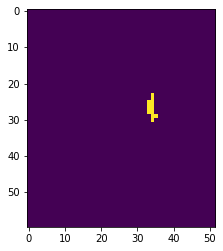

In [154]:
plt.imshow(labels==30)



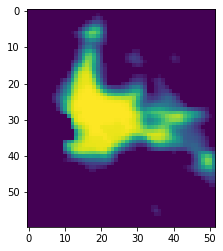

In [55]:
plt.imshow(im1_gr)

In [42]:
plt.imshow(im_gr)

NameError: name 'im_gr' is not defined

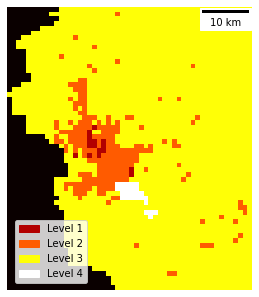

In [40]:
data = P

# get the unique values from data
# i.e. a sorted list of all values in data
values = np.unique(data.ravel())

plt.figure(figsize=(6, 5.2))
im = plt.imshow(data,cmap = plt.cm.hot)

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Level {l}".format(l=int(values[i])) ) for i in range(1,5) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(0.33, 0.25), loc=1, borderaxespad=0.1 )
plt.axis('off')
scalebar = ScaleBar(1000) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)

plt.savefig("figures/01_importance_level_map.pdf", dpi = 150)

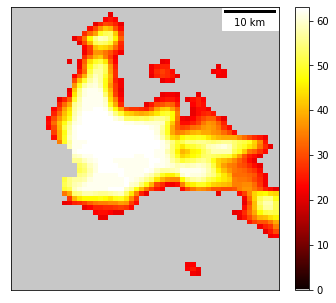

In [41]:
custom_cmap = cm.get_cmap('hot', 256)
newcolors = custom_cmap(np.linspace(0, 1, 256))
pink = np.array([200/256, 200/256, 200/256, 1])
newcolors[:1, :] = pink
newcmp = ListedColormap(newcolors)
plot_examples(im1,[newcmp],"figures/02_original_nighttime.pdf")


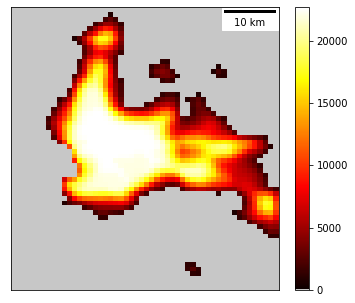

In [42]:

plot_examples(im1_gr,[newcmp],"figures/03_gravitational_nighttime_map.pdf")


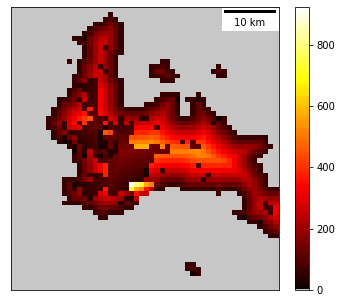

In [44]:
plot_examples(W3,[newcmp],"figures/04_priority_levels.pdf")



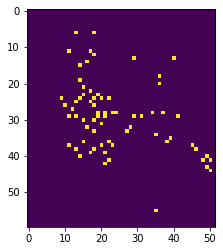

In [59]:
plt.imshow(positionsB)


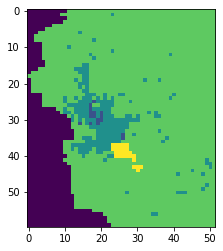

In [127]:
plt.imshow(P)

In [60]:
result = np.where(positionsB == 1)
result

(array([ 6,  6, 11, 11, 12, 13, 13, 14, 15, 18, 19, 20, 21, 22, 23, 23, 24,
        24, 24, 24, 24, 25, 25, 26, 26, 27, 28, 28, 28, 28, 28, 28, 29, 29,
        29, 29, 29, 29, 29, 30, 30, 31, 32, 32, 33, 33, 34, 35, 36, 36, 36,
        37, 37, 37, 37, 38, 38, 38, 39, 39, 40, 40, 41, 41, 41, 42, 43, 44,
        55]),
 array([13, 18, 11, 17, 18, 29, 40, 16, 14, 36, 14, 36, 15, 17, 15, 19,  9,
        14, 18, 20, 22, 13, 17, 10, 18, 12, 19, 21, 23, 24, 34, 37, 11, 13,
        19, 21, 29, 31, 41, 15, 18, 20, 16, 28, 18, 27, 35, 39, 15, 22, 38,
        11, 20, 23, 45, 13, 18, 46, 17, 21, 14, 49, 22, 48, 50, 21, 49, 50,
        35]))

In [86]:
ls = list()

for i,r in enumerate(result[0][:]):

#    print(result[0][i])
    ls.append((result[0][i],result[1][i]))
    
ls

[(6, 13),
 (6, 18),
 (11, 11),
 (11, 17),
 (12, 18),
 (13, 29),
 (13, 40),
 (14, 16),
 (15, 14),
 (18, 36),
 (19, 14),
 (20, 36),
 (21, 15),
 (22, 17),
 (23, 15),
 (23, 19),
 (24, 9),
 (24, 14),
 (24, 18),
 (24, 20),
 (24, 22),
 (25, 13),
 (25, 17),
 (26, 10),
 (26, 18),
 (27, 12),
 (28, 19),
 (28, 21),
 (28, 23),
 (28, 24),
 (28, 34),
 (28, 37),
 (29, 11),
 (29, 13),
 (29, 19),
 (29, 21),
 (29, 29),
 (29, 31),
 (29, 41),
 (30, 15),
 (30, 18),
 (31, 20),
 (32, 16),
 (32, 28),
 (33, 18),
 (33, 27),
 (34, 35),
 (35, 39),
 (36, 15),
 (36, 22),
 (36, 38),
 (37, 11),
 (37, 20),
 (37, 23),
 (37, 45),
 (38, 13),
 (38, 18),
 (38, 46),
 (39, 17),
 (39, 21),
 (40, 14),
 (40, 49),
 (41, 22),
 (41, 48),
 (41, 50),
 (42, 21),
 (43, 49),
 (44, 50),
 (55, 35)]

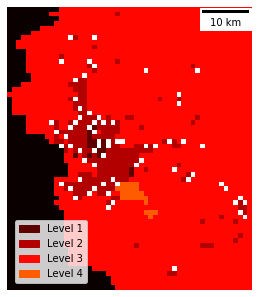

In [44]:
B = np.zeros(im1_gr.shape)
for i in range(1,B.shape[0]-1):
    for j in range(1,B.shape[1]-1):

        B[i][j] = getN(W2,i,j)
        
positionsB = B*(im1>0)

locationsP = np.zeros(P.shape)
for i in range(0,P.shape[0]):
    for j in range(0,P.shape[1]):
        locationsP[i][j] = 8 if positionsB[i][j]==1 else P[i,j]

data = locationsP

# get the unique values from data
# i.e. a sorted list of all values in data
values = np.unique(data.ravel())

plt.figure(figsize=(6, 5.2))
im = plt.imshow(data,cmap = plt.cm.hot)

# get the colors of the values, according to the 
# colormap used by imshow
colors = [ im.cmap(im.norm(value)) for value in values]

# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="Level {l}".format(l=int(values[i])) ) for i in range(1,5) ]

# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(0.33, 0.25), loc=1, borderaxespad=0.1 )
plt.axis('off')
scalebar = ScaleBar(1000) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)

plt.savefig("figures/05_positions_and_importance.pdf", dpi = 150)

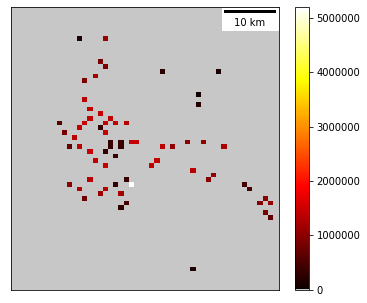

In [20]:
custom_cmap = cm.get_cmap('hot', 256)
newcolors = custom_cmap(np.linspace(0, 1, 256))
pink = np.array([200/256, 200/256, 200/256, 1])
newcolors[:1, :] = pink
newcmp = ListedColormap(newcolors)
plot_examples(W2*positionsB,[newcmp],"figures/06_positions_with_priority.pdf")

**Referencias**

* https://grass.osgeo.org/grass76/manuals/r.neighbors.html

* https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

Este es el 
* https://bookdown.org/markhoff/social_network_analysis/finding-groups-in-networks.html

* https://networkx.org/documentation/stable/reference/algorithms/component.html

Plática con Ivvan
* https://homepages.inf.ed.ac.uk/rbf/HIPR2/distance.htm
* https://answers.opencv.org/question/97681/better-ways-to-get-the-ridges-of-distance-transform-map/